In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from CosinorPy import file_parser, cosinor, cosinor1
from RhythmCount import data_processing as dproc
from RhythmCount import plot

In [2]:
data = pd.read_csv("../PrometneNesreče.csv")

C:\Users\Hana\AppData\Local\Temp\ipykernel_15612\3596567331.py:1: DtypeWarning: Columns (31,32,33,34,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../PrometneNesreče.csv")


In [3]:
# Število prometnih nesreč po urah
# Pretvori stolpec 'NastanekDatumCas' v pravilen format (vsaka vrednost bo pandas objekt za datum in čas)
data['NastanekDatumCas'] = pd.to_datetime(data['NastanekDatumCas'], format='ISO8601', errors='coerce')

# Za vsak vnos pridobi znotraj, katere ure se je zgodil
hours = data['NastanekDatumCas'].dt.hour

accidents_per_hour = hours.value_counts()

# Uredi podatke po vrstnem redu ur (naraščajoče)
accidents_per_hour = accidents_per_hour.sort_index()

# Ustvari pandas dataframe v formatu, ki bo primeren za uporabo CosinorPy
df_plot = pd.DataFrame({
    "test": "HourlyAccidents",  # konstantna oznaka vseh vrstic
    "x": accidents_per_hour.index,  # Ura (od 0 do 23)
    "y": accidents_per_hour.values  # Število nesreč za tisto uro
})

#print(df_plot)

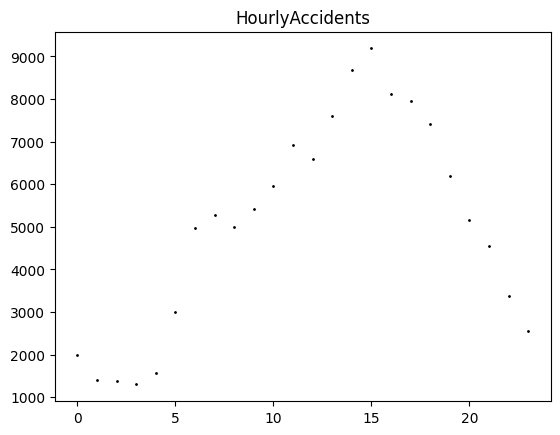

In [4]:
cosinor.plot_data(df_plot, names = ["HourlyAccidents"])

## Periodogram

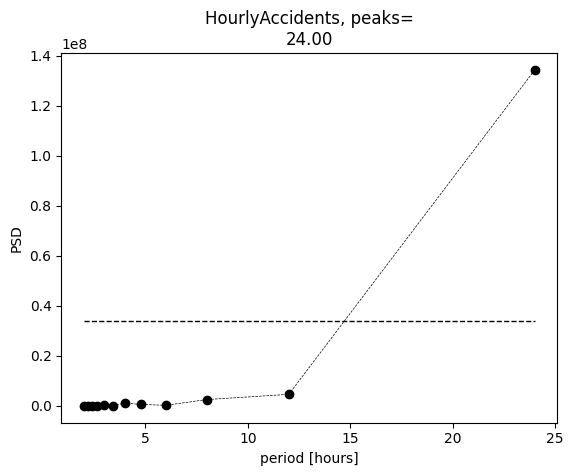

In [5]:
cosinor.periodogram_df(df_plot)

## CosinorPy

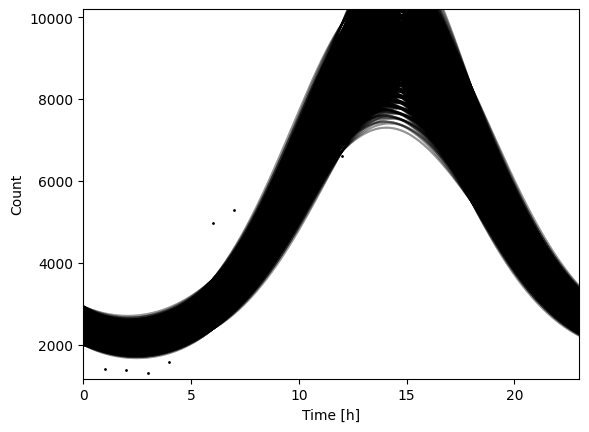

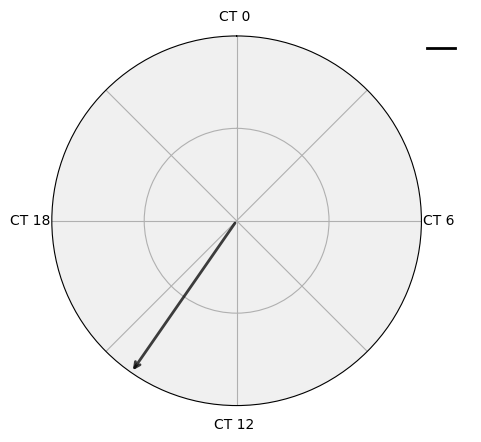

In [6]:
#df_results = cosinor.fit_group(df_plot, n_components = [1,2,3,4,5,6,7,8], period = 24)

X = df_plot.x.to_numpy()
Y = df_plot.y.to_numpy()

df_results = cosinor.fit_me(X, Y, n_components = 1, period = 24, model_type = 'gen_poisson')

# results = {}
# for n in [1,2,3,4,5,6,7,8]:
#     results[n] = cosinor.fit_me(X, Y, n_components = 1, period = 24, model_type = 'gen_poisson')
#print(df_results)

In [22]:
df_results

(<statsmodels.discrete.discrete_model.GeneralizedPoissonResultsWrapper at 0x252800cc320>,
 {'p': 1.8535054351793343e-12, 'RSS': 17247632.41146792, 'count': 121570},
 {'period': 24,
  'amplitude': 3569.987199363104,
  'acrophase': 2.534658337130504,
  'mesor': 5700.516713485484,
  'peaks': array([14.31831832]),
  'heights': array([9270.50391285]),
  'troughs': array([2.30630631]),
  'heights2': array([2130.52951412]),
  'max_loc': 298,
  'period2': 24},
 array([ 0.        ,  0.04804805,  0.0960961 ,  0.14414414,  0.19219219,
         0.24024024,  0.28828829,  0.33633634,  0.38438438,  0.43243243,
         0.48048048,  0.52852853,  0.57657658,  0.62462462,  0.67267267,
         0.72072072,  0.76876877,  0.81681682,  0.86486486,  0.91291291,
         0.96096096,  1.00900901,  1.05705706,  1.10510511,  1.15315315,
         1.2012012 ,  1.24924925,  1.2972973 ,  1.34534535,  1.39339339,
         1.44144144,  1.48948949,  1.53753754,  1.58558559,  1.63363363,
         1.68168168,  1.72972973

## RhythmCount

In [8]:
# Ustvari pandas dataframe v formatu, ki bo primeren za uporabo RhythmCount
df_plot_RC = pd.DataFrame({
    "test": "HourlyAccidents",  # konstantna oznaka vseh vrstic
    "X": accidents_per_hour.index,  # Ura (od 0 do 23)
    "Y": accidents_per_hour.values  # Število nesreč za tisto uro
})

In [9]:
count_models = ['poisson', 'zero_poisson', 'gen_poisson', 'nb', 'zero_nb']
n_components = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

c:\Users\Hana\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Hana\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Hana\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Hana\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

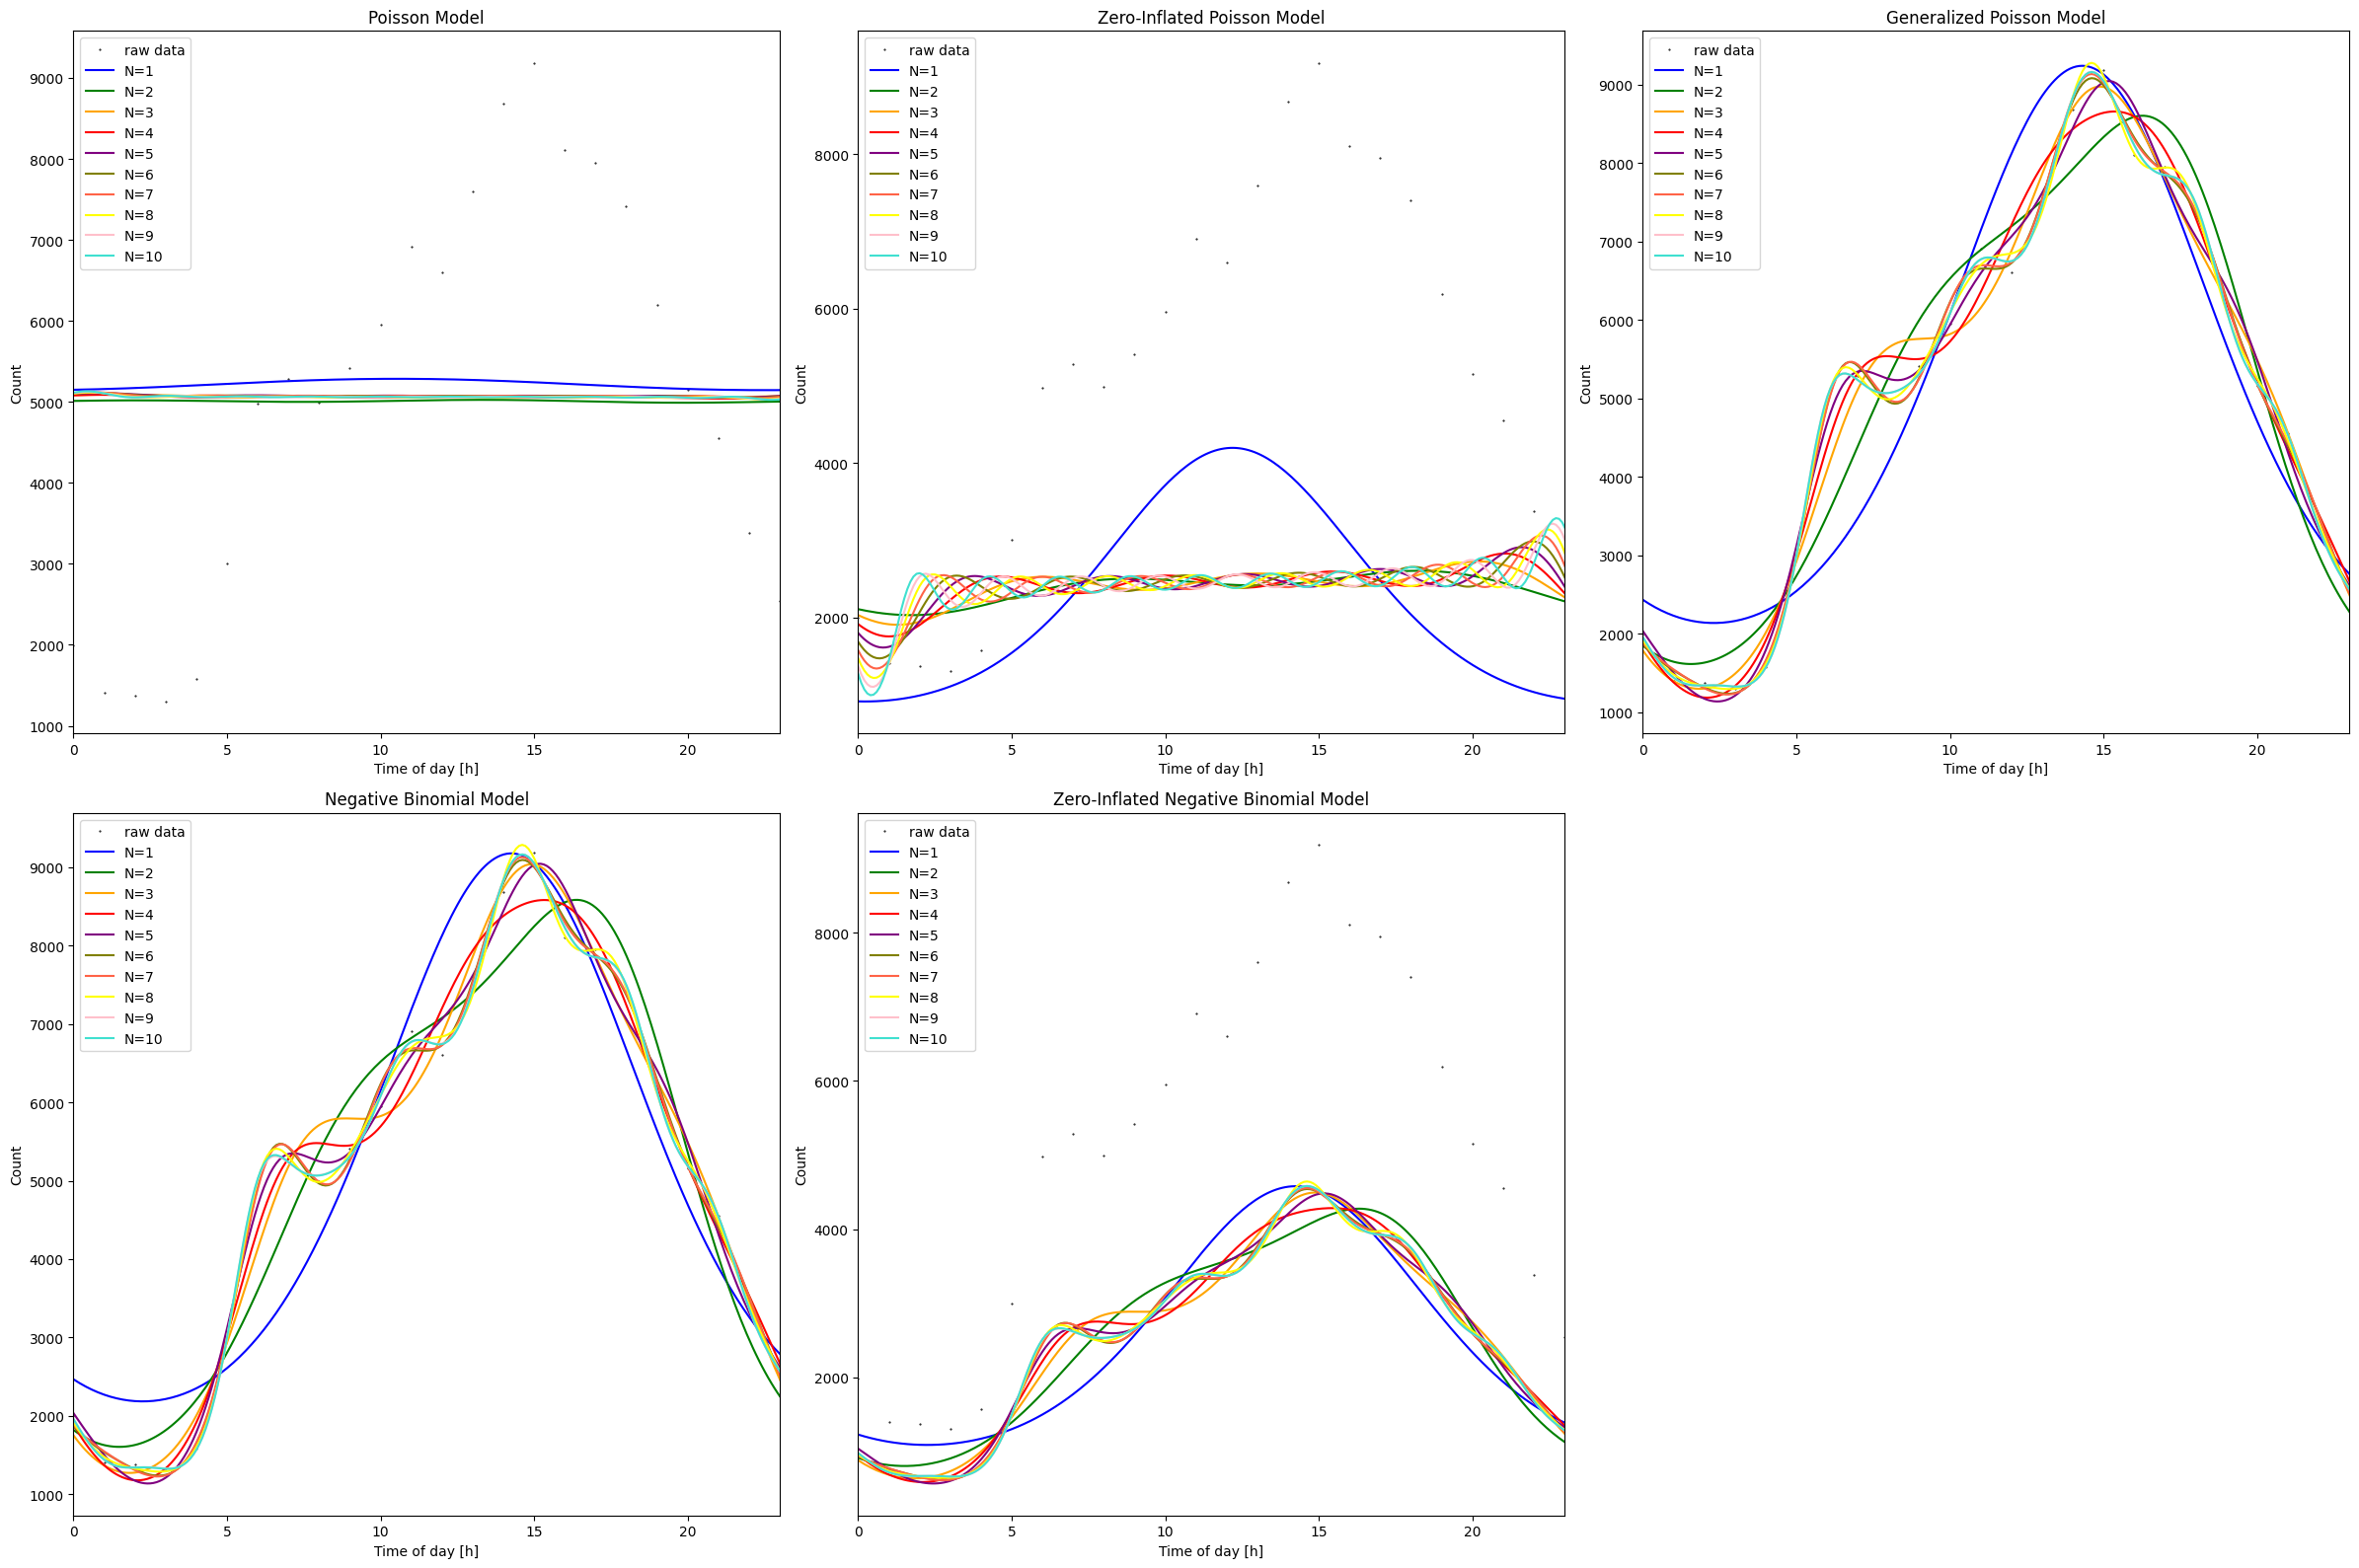

In [10]:
df_results_RC = dproc.fit_to_models(df_plot_RC, count_models, n_components, 24)

In [11]:
display(df_results_RC)

,count_model,n_components,amplitude,mesor,peaks,heights,llr_pvalue,RSS,AIC,BIC,log_likelihood,logs,mean(est),Y(est),X_test,Y_test
0,poisson,1,70.12,5214.94,[10.51],[5285.06],1.843291e-112,1.414538e+08,31436.112238,31439.646399,-15715.056119,"[-1271.3758305949705, -1932.0113524657227, -19...",5214.708893,"[5149.714366512108, 5158.531386449633, 5171.16...","[0.0, 0.1001001001001001, 0.2002002002002002, ...","[5149.714366512108, 5150.406386129903, 5151.14..."
1,poisson,2,17.87,5007.37,"[2.0, 13.31]","[5018.83, 5025.24]",1.000000e+00,1.441474e+08,31956.599544,31962.489813,-15973.299772,"[-1187.616025755684, -1829.5220895605808, -186...",5008.252307,"[5011.97692421163, 5016.97660850909, 5018.8289...","[0.0, 0.1001001001001001, 0.2002002002002002, ...","[5011.97692421163, 5012.592753971926, 5013.186..."
2,poisson,3,18.59,5071.68,"[1.3, 9.41, 16.02]","[5090.27, 5075.29, 5073.54]",1.000000e+00,1.445885e+08,32047.403707,32055.650084,-16016.701854,"[-1231.2270482837812, -1882.1624468032414, -19...",5070.808877,"[5083.99239993349, 5089.8691640796105, 5088.73...","[0.0, 0.1001001001001001, 0.2002002002002002, ...","[5083.99239993349, 5084.862171570223, 5085.676..."
3,poisson,4,22.89,5064.42,"[1.0, 7.21, 12.51, 17.92]","[5087.31, 5065.01, 5063.21, 5061.5]",1.000000e+00,1.446533e+08,32064.294522,32074.897006,-16023.147261,"[-1229.099170257332, -1880.3106169412122, -191...",5060.780429,"[5080.494003591537, 5087.311701054426, 5080.27...","[0.0, 0.1001001001001001, 0.2002002002002002, ...","[5080.494003591537, 5081.786140076578, 5082.95..."
4,poisson,5,27.95,5081.32,"[0.8, 5.91, 10.31, 14.71, 19.12]","[5109.28, 5081.4, 5077.8, 5076.87, 5074.98]",1.000000e+00,1.446730e+08,32071.801593,32084.760185,-16024.900797,"[-1241.230646243439, -1895.8918363762086, -192...",5075.383068,"[5100.418401224409, 5108.814875566738, 5093.63...","[0.0, 0.1001001001001001, 0.2002002002002002, ...","[5100.418401224409, 5102.385417763757, 5104.13..."
5,poisson,6,32.77,5080.62,"[0.7, 5.01, 8.71, 12.51, 16.12, 19.82]","[5113.39, 5078.99, 5075.86, 5074.22, 5073.25, ...",1.000000e+00,1.447364e+08,32088.279930,32103.594630,-16031.139965,"[-1243.0248613831682, -1897.631001914834, -191...",5072.712675,"[5103.360931762162, 5111.21291302211, 5085.833...","[0.0, 0.1001001001001001, 0.2002002002002002, ...","[5103.360931762162, 5106.006033053817, 5108.28..."
6,poisson,7,37.73,5083.09,"[0.6, 4.3, 7.51, 10.81, 14.01, 17.22, 20.42]","[5120.83, 5081.09, 5077.37, 5074.78, 5074.96, ...",1.000000e+00,1.447210e+08,32089.147488,32106.818295,-16029.573744,"[-1246.5777865329, -1900.6791781285492, -1912....",5073.358844,"[5109.184565065304, 5115.414844317232, 5079.31...","[0.0, 0.1001001001001001, 0.2002002002002002, ...","[5109.184565065304, 5112.686101200962, 5115.62..."
7,poisson,8,42.60,5073.76,"[0.5, 3.8, 6.71, 9.51, 12.31, 15.12, 18.02, 20...","[5116.36, 5071.74, 5066.8, 5065.0, 5063.93, 50...",1.000000e+00,1.447306e+08,32095.208319,32115.235234,-16030.604160,"[-1242.7603290695388, -1894.1352925791825, -18...",5062.459384,"[5102.92716440388, 5106.392443142956, 5061.961...","[0.0, 0.1001001001001001, 0.2002002002002002, ...","[5102.92716440388, 5107.408625297595, 5111.064..."
8,poisson,9,47.61,5075.76,"[0.5, 3.4, 6.01, 8.51, 11.01, 13.61, 16.12, 18...","[5123.37, 5073.46, 5067.85, 5065.81, 5064.68, ...",1.000000e+00,1.447276e+08,32098.546204,32120.929226,-16030.273102,"[-1246.070799068615, -1894.3346288407056, -189...",5062.775283,"[5108.353816609348, 5106.667367750398, 5057.17...","[0.0, 0.1001001001001001, 0.2002002002002002, ...","[5108.353816609348, 5113.89750448104, 5118.272..."
9,poisson,10,52.59,5077.74,"[0.4, 3.1, 5.41, 7.71, 10.01, 12.31, 14.51, 16...","[5130.32, 5075.1, 5068.89, 5066.56, 5065.34, 5...",1.000000e+00,1.447363e+08,32104.170754,32128.909885,-16031.085377,"[-1249.3496285825204, -1893.1311292500732, -18...",5063.031506,"[5113.724975647831, 5105.007415520978, 5055.57...","[0.0, 0.1001001001001001, 0.2002002002002002, ...","[5113.724975647831, 5120.430161607746, 5125

## Kateri model je najboljši?

#### Najprej pogledamo, kateri model je najboljši, nato kolikšno število komponent je najboljše.

In [12]:
best_count_model = dproc.get_best_count_model(df_results_RC, 'Vuong')
print("Best model: {}".format(best_count_model.count_model))
best_model = dproc.get_best_n_components(df_results_RC, 'Vuong', count_model=best_count_model['count_model'])
print("Number of components: {}".format(best_model.n_components))

Best model: gen_poisson
Number of components: 6


#### Najprej pogledamo, kolikšno število komponent je najboljše, nato, kateri model je najboljši. 

In [13]:
best_n_components = dproc.get_best_n_components(df_results_RC, 'Vuong')
print("Number of components: {}".format(best_n_components.n_components))
best_model = dproc.get_best_count_model(df_results_RC, 'Vuong', n_components=best_n_components['n_components'])
print("Best model: {}".format(best_model.count_model))

Number of components: 6
Best model: gen_poisson


### Prikaz najboljšega modela skupaj z intervali zaupanja

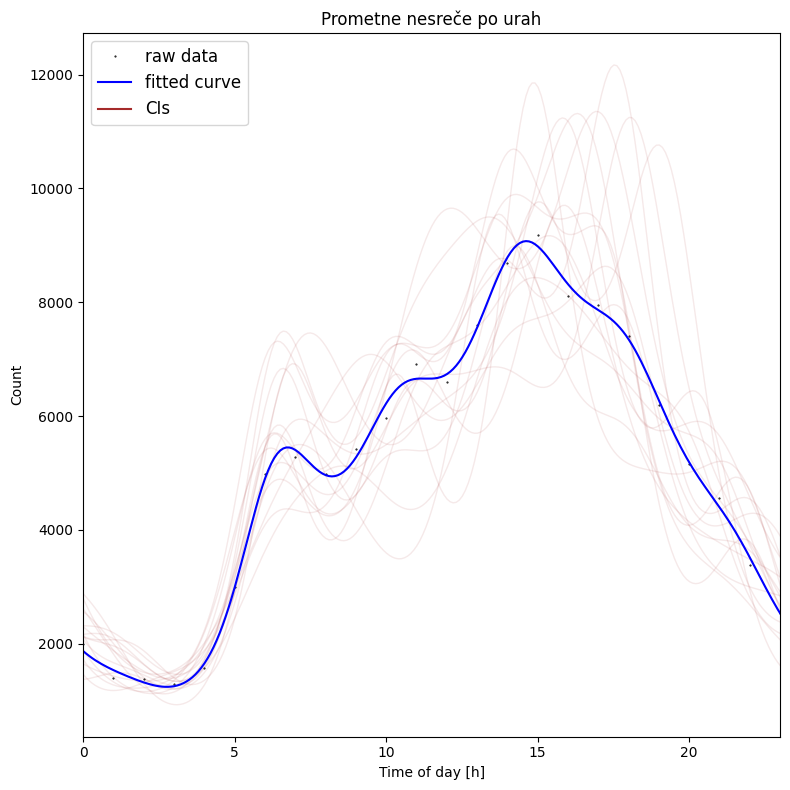

Intervali zaupanja:


,0,1
0,8.296406,8.470946
1,-0.501871,-0.304395
2,-0.817253,-0.568194
3,-0.272388,-0.060924
4,-0.311544,-0.088609
5,-0.265765,-0.014389
6,-0.038093,0.158900
7,-0.127829,0.120311
8,-0.036509,0.166150
9,-0.049161,0.165246


In [14]:
# print(type(best_model))
# print(type(best_n_components))

# print(best_n_components)

count_model = best_model.count_model
n_components = int(best_n_components.n_components)

CIs = plot.plot_model(df_plot_RC, count_model, n_components, title='Prometne nesreče po urah', plot_CIs=True)
print('Intervali zaupanja:')
display(CIs)

### Parametri izbranega modela

In [17]:
CIs_params = dproc.calculate_confidence_intervals_parameters(df_plot_RC, n_components, count_model, best_model['peaks'])
best_model = pd.concat([best_model, pd.Series(CIs_params)], axis=0)
best_model=best_model[['count_model','n_components','amplitude', 'mesor', 'peaks', 'heights','amplitude_CIs','mesor_CIs','peaks_CIs','heights_CIs']]
print('Parametri modela in njihovi intervali zaupanja:')
display(best_model.to_frame())

Parametri modela in njihovi intervali zaupanja:


,0
count_model,gen_poisson
n_components,6
amplitude,3924.46
mesor,5158.67
peaks,[14.61]
heights,[9083.13]
amplitude_CIs,"[3700.72, 4097.53]"
amplitude_CIs,"[2786.05, 5474.51]"
mesor_CIs,"[4997.34, 5359.37]"
mesor_CIs,"[4026.88, 6712.3]"
